## Ejercicios de pair programming 30 enero: Métricas

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y métricas
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

### Info columnas
|Column| Type | Description |
|-------|--------------|-------------|
|distance_from_home| float64|	The distance from home where the transaction happened
|distance_from_last_transaction| float64|	The distance from last transaction happened.
|ratio_to_median_purchase_price| float64|	Ratio of purchased price transaction to median purchase price.
|repeat_retailer| float64|	Is the transaction happened from same retailer. 
|used_chip| float64|	Is the transaction through chip (credit card)
|used_pin_number| float64|	Is the transaction happened by using PIN number. 
|online_order | float64| Is the transaction an online order.
|fraud | float64| Is the transaction fraudulent.   

Enlace del *DataFrame* *[card_transdata](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud)*

In [3]:
df = pd.read_csv("../datos/card_transdata_esta.csv", index_col = 0)
df.head(2)

,repeat_retailer,used_chip,used_pin_number,online_order,fraud,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
0,1,1,0,0,0,0.477882,-0.182849,0.043491
1,1,0,0,0,0,-0.241607,-0.188094,-0.189300


In [3]:
balanceado = pd.read_csv("../datos/card_transdata_balanceado.csv", index_col = 0)
balanceado.head(2)

,repeat_retailer,used_chip,used_pin_number,online_order,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,fraud
84611,1,1,0,1,0.556775,-0.174485,7.055171,1
596799,1,0,0,1,-0.265485,-0.043104,-0.526287,0


--- 

### Variables estandarizadas

---

In [4]:
#Repetimos el mismo proceso que en el ejercicio anterior
X1 = df.drop("fraud", axis = 1)
y1 = df["fraud"]

In [5]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [6]:
# definimos la regresión logistica
log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

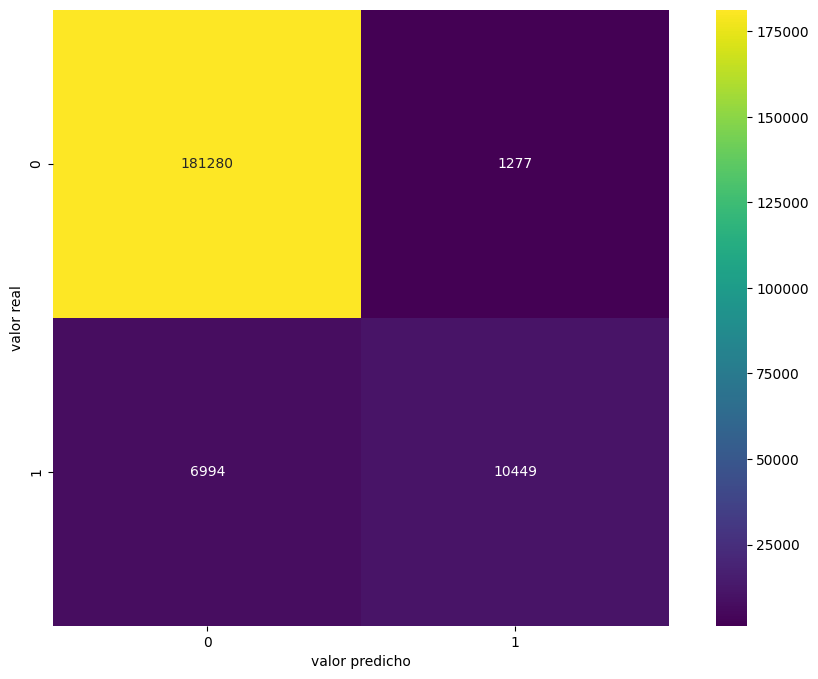

In [7]:
# MATRIZ DE CONFUSIÓN PARA DATOS ESTANDARIZADOS

mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

0 = NO ES FRAUDE
1 = ES FRAUDE

In [16]:
#Definimos la función para sacar las métricas de nuestro modelo
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
     
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                        "f1": [f1_test, f1_train],
                       "kappa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [17]:
results_logistic_esta = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Regresión logistica Estandarizados")
results_logistic_esta

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.958645,0.891097,0.599037,0.716446,0.695063,test,Regresión logistica Estandarizados
1,0.958769,0.893075,0.600400,0.718060,0.696737,train,Regresión logistica Estandarizados


En nuestro modelo lo que más nos interesa es medir los falsos negativos y minimizar los casos en los que nuestro modelo no detecta fraude pero en realidad si lo es.

Para medir esto nos fijaremos en el recall, vemos que tiene un valor de 60%, es decir, nuestro modelo es capaz de detectar un 60% de los fraudes. Consideramos que podría mejorar ya que es un 40% de fallo.

Por otro lado kappa es bastante alto, lo que nos indica que es una predicción fiable, es decir que no acierta por azar.

---

### Datos estandarizados y balanceados

---

In [18]:
X2 = balanceado.drop("fraud", axis = 1)
y2 = balanceado["fraud"]

In [19]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [20]:
# definimos la regresión logistica
log_reg_bal = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_bal.fit(x_train2,y_train2)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_bal = log_reg_bal.predict(x_train2)

# obtenemos las predicciones para el conjunto de test
y_pred_test_bal = log_reg_bal.predict(x_test2)

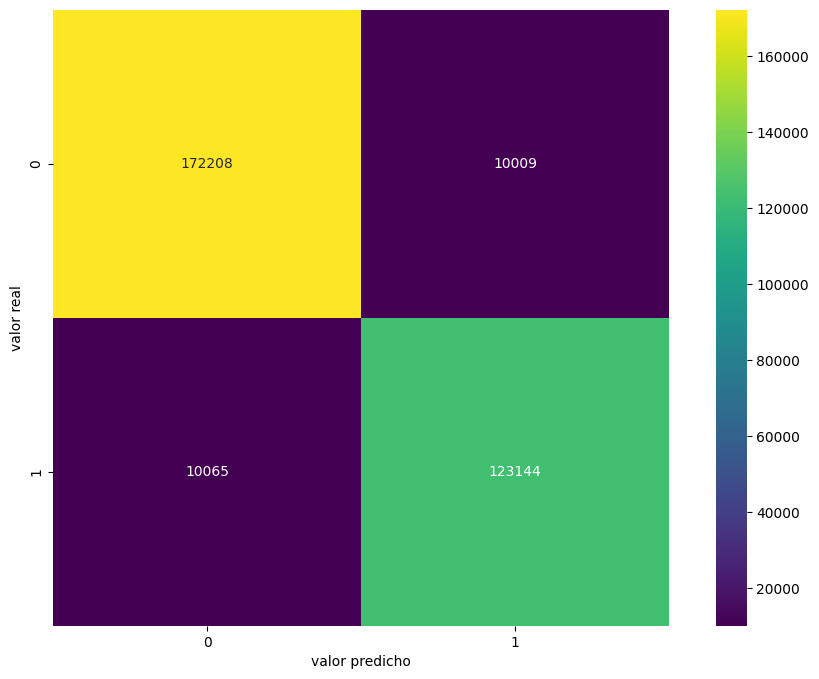

In [22]:
# MATRIZ DE CONFUSIÓN PARA DATOS ESTANDARIZADOS Y BALANCEADOS

mat_lr2 = confusion_matrix(y_test2, y_pred_test_bal)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr2, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [24]:
results_logistic_bal = metricas(y_test2, y_pred_test_bal, y_train2, y_pred_train_bal, "Regresión logistica Balanceados")
results_logistic_bal

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.936359,0.924831,0.924442,0.924636,0.869562,test,Regresión logistica Balanceados
1,0.936182,0.923909,0.924610,0.924259,0.869121,train,Regresión logistica Balanceados


Con los datos balanceados podemos ver que nuestro modelo es mucho mejor. 

El recall aumenta hasta un 92%, con lo cual el fallo es muy bajo en la detección de falsos negativos.

El kappa igualmente es muy alto, casi del 90%, con lo cual es muy fiable el modelo.

In [25]:
resultados_todo = pd.concat([results_logistic_esta, results_logistic_bal], axis = 0) #Unimos los resultados del modelo con ambos tipos de datos
resultados_todo

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.958645,0.891097,0.599037,0.716446,0.695063,test,Regresión logistica Estandarizados
1,0.958769,0.893075,0.600400,0.718060,0.696737,train,Regresión logistica Estandarizados
0,0.936359,0.924831,0.924442,0.924636,0.869562,test,Regresión logistica Balanceados
1,0.936182,0.923909,0.924610,0.924259,0.869121,train,Regresión logistica Balanceados


Al final decidimos quedarnos con los balanceado porque todos los resultados son muchos mejores de los del Estandarizados.

In [26]:
#Guardamos los resultados para futuras comparaciones
resultados_todo.to_csv("../datos/resultados_fraude.csv")